***Name : Ritabrato Pani  <br>
Roll no : 22053095      <br>
Topic : K-means clustering***

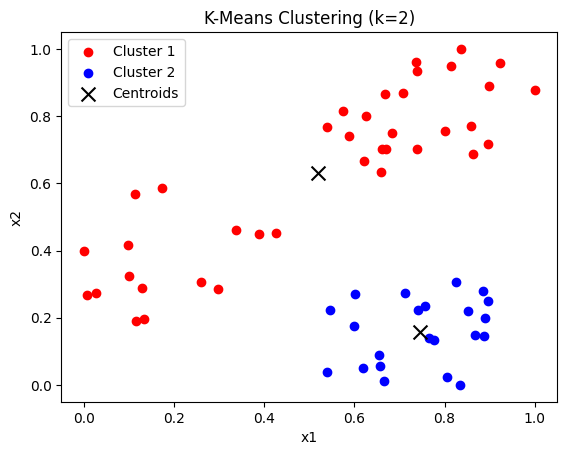

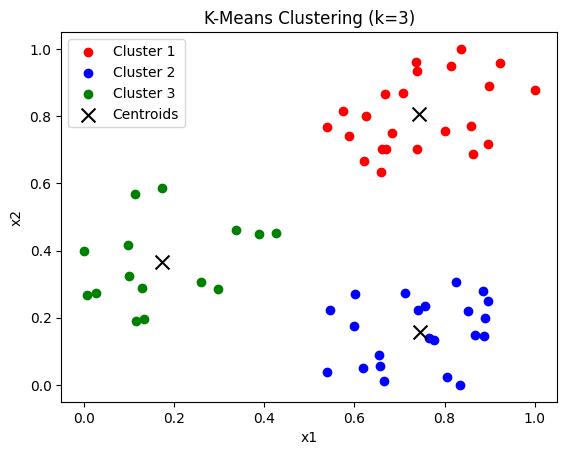

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("dataset.csv")
data = df.to_numpy()

# Normalize data
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

k_values = [2, 3]
for k in k_values:
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(100):
        clusters = []
        for point in data:
            distances = [np.sqrt(np.sum((point - centroid) ** 2)) for centroid in centroids]
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)
        
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        if np.all(np.abs(new_centroids - centroids) < 1e-4):
            break
        
        centroids = new_centroids
    
    colors = ['r', 'b', 'g', 'c', 'm', 'y']
    for i in range(k):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.show()
